# **Phishing Detection: Analyzing URL Features to Identify Fraudulent Websites**

College : Great Lakes Institute of Management

Team name : Operational Analysts 

- Ashwin Patwardhan
- Sayan De
- Kaustav Dutta Choudhury

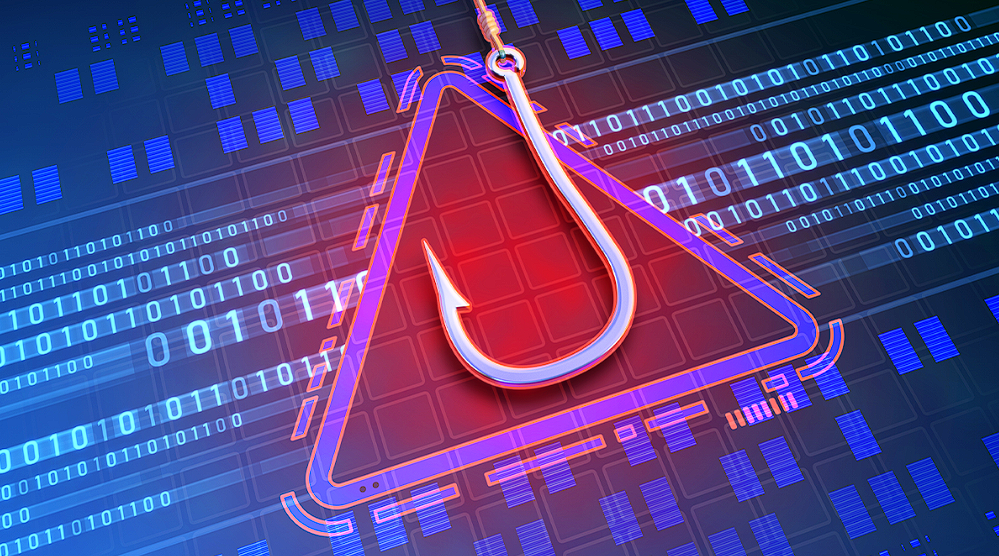

### **Context**
ShopSecure, an e-commerce platform, encountered a significant security breach due to unchecked third-party advertisements that led to phishing attacks on its users. This project aims to leverage machine learning to classify URLs as either legitimate or phishing, helping ShopSecure to strengthen its security measures and regain customer trust

.
**Problem Statement:**

Phishing is a fraudulent activity where attackers impersonate reputable individuals or organizations to acquire sensitive information such as login credentials or financial account details. This is typically carried out through email or other communication platforms, where the victim receives a message that appears to be from a trusted source. These messages often contain malicious software designed to infect the victim’s computer or direct them to harmful websites, with the intention of deceiving them into sharing confidential information like passwords, account IDs, or credit card numbes
RL.

##

### **Objective**
To analyze URL data and develop a reliable binary classification model that can identify malicious (phishing) URLs. This model will assist ShopSecure in detecting phishing attempts proactively and ensuring a safer platform for users.

### **Dataset Description**
- **Total Samples**: 11,000 URLs
- **Features**: 32 characteristics of URLs, with values as:
  - `-1`: Suspicious
  - `0`: Phishing
  - `1`: Legitimate
- **Target Variable**: `Result` (Binary)  
  - **0**: Phishing  
  - **1**: Legitimate  

### **Approach**
1. **Exploratory Data Analysis (EDA)**:
   - Visualize the distribution of features and analyze patterns.
   - Identify and handle any correlated features.
  
2. **Data Preparation**:
   - Split data into training and testing sets.
   - Scale features for model compatibility.

3. **Model Building**:
   - Train multiple binary classifiers (e.g., Logistic Regression, Random Forest).
   - Evaluate each model’s performance with accuracy and cross-validation scores.
   
4. **Model Evaluation**:
   - Plot ROC curves and assess each model’s diagnostic capability.
   - Optimize the best-performing model through hyperparameterure use.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
# Load the dataset
shop = pd.read_csv('/content/shop.csv')

In [ ]:
# Initial exploration
shop.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


In [ ]:
shop.shape

(11055, 32)

In [ ]:
shop_eda = shop.copy()

In [ ]:
shop_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        11055 non-null  object
 1   having_IPhaving_IP_Address   11055 non-null  int64 
 2   URLURL_Length                11055 non-null  int64 
 3   Shortining_Service           11055 non-null  int64 
 4   having_At_Symbol             11055 non-null  int64 
 5   double_slash_redirecting     11055 non-null  int64 
 6   Prefix_Suffix                11055 non-null  int64 
 7   having_Sub_Domain            11055 non-null  int64 
 8   SSLfinal_State               11055 non-null  int64 
 9   Domain_registeration_length  11055 non-null  int64 
 10  Favicon                      11055 non-null  int64 
 11  port                         11055 non-null  int64 
 12  HTTPS_token                  11055 non-null  int64 
 13  Request_URL                  11

In [ ]:
shop_eda.isnull().sum()

,0
index,0
having_IPhaving_IP_Address,0
URLURL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0


In [ ]:
shop_eda.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [ ]:
shop_eda.drop('index',axis = 1 , inplace = True)

## Exploratory Data Analysis

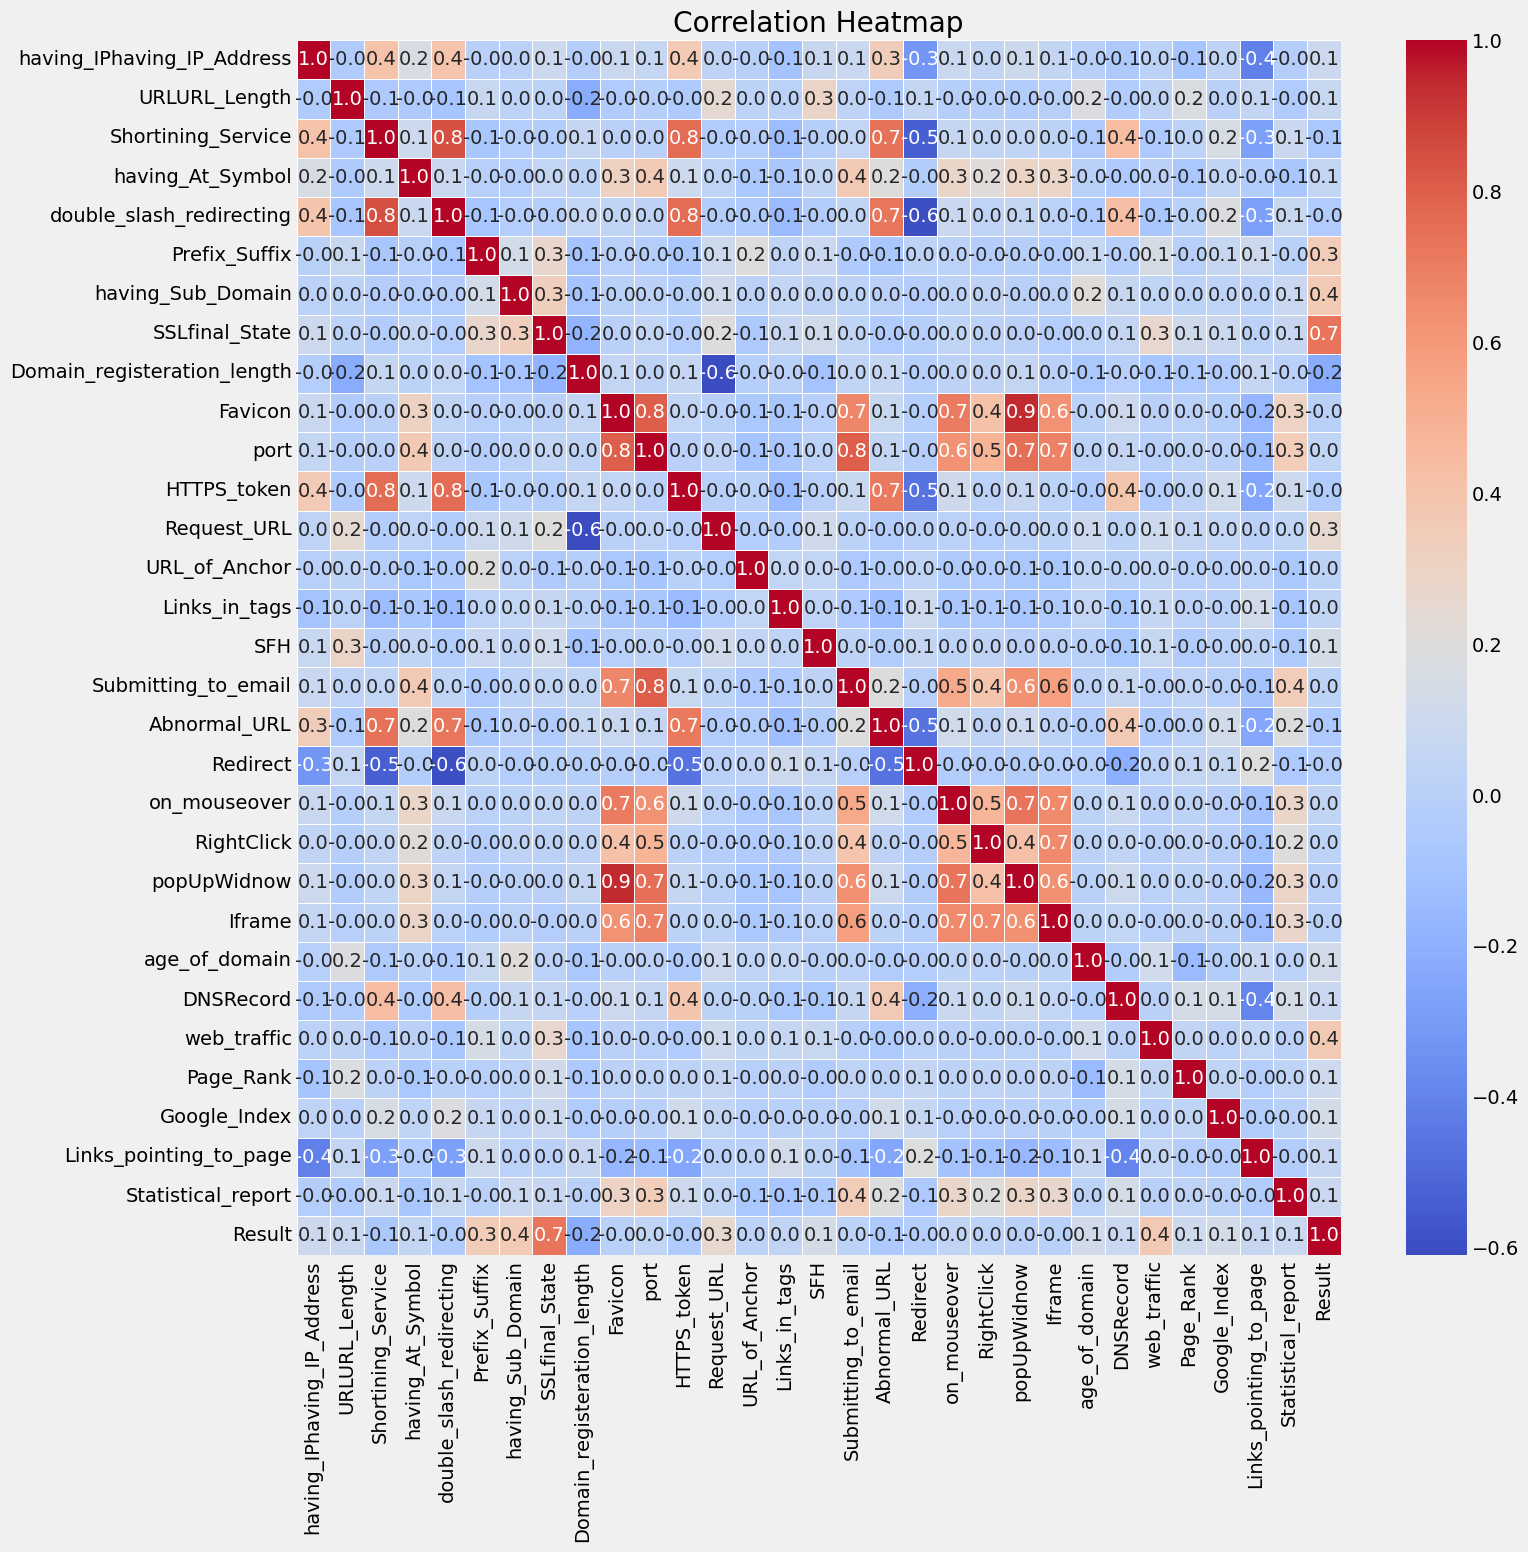

In [ ]:
# Compute correlation matrix
correlation_matrix = shop_eda.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5,fmt = '.1f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Set a correlation threshold (e.g., 0.85)
correlation_threshold = 0.75

# Identify pairs of highly correlated features
high_corr_pairs = correlation_matrix[
    (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() < 1)
]
high_corr_pairs = high_corr_pairs.stack().index.tolist()
print("Highly Correlated Feature Pairs:", high_corr_pairs)

Highly Correlated Feature Pairs: [('Shortining_Service', 'double_slash_redirecting'), ('Shortining_Service', 'HTTPS_token'), ('double_slash_redirecting', 'Shortining_Service'), ('double_slash_redirecting', 'HTTPS_token'), ('Favicon', 'port'), ('Favicon', 'popUpWidnow'), ('port', 'Favicon'), ('port', 'Submitting_to_email'), ('HTTPS_token', 'Shortining_Service'), ('HTTPS_token', 'double_slash_redirecting'), ('Submitting_to_email', 'port'), ('popUpWidnow', 'Favicon')]


In [ ]:
# List of highly correlated feature pairs to drop
correlated_pairs = [
    ('Shortining_Service', 'double_slash_redirecting'),
    ('Shortining_Service', 'HTTPS_token'),
    ('double_slash_redirecting', 'Shortining_Service'),
    ('double_slash_redirecting', 'HTTPS_token'),
    ('Favicon', 'port'),
    ('Favicon', 'popUpWidnow'),
    ('port', 'Favicon'),
    ('port', 'Submitting_to_email'),
    ('HTTPS_token', 'Shortining_Service'),
    ('HTTPS_token', 'double_slash_redirecting'),
    ('Submitting_to_email', 'port'),
    ('popUpWidnow', 'Favicon')
]

# Create a list of features to drop
features_to_drop = set()

# Iterate through the correlated pairs and add one feature from each pair to the drop list
for pair in correlated_pairs:
    features_to_drop.add(pair[1])  # Drop the second feature in the pair

# Drop the selected features from the dataframe
shop_new = shop_eda.drop(columns=features_to_drop)

# Display the updated dataframe
shop_new.head()


,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,1,1,0,0,0,0,1,0,1,...,1,1,0,0,0,0,1,1,0,0
1,1,1,1,0,-1,1,0,1,-1,0,...,1,1,0,0,-1,0,1,1,1,0
2,1,-1,1,0,0,0,0,1,-1,0,...,1,1,1,0,1,0,1,-1,0,0
3,1,-1,1,0,0,0,1,0,-1,-1,...,1,1,0,0,1,0,1,0,1,0
4,1,-1,1,0,1,1,0,1,-1,-1,...,1,1,0,0,-1,0,1,1,1,1


In [ ]:
shop_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   having_At_Symbol             11055 non-null  int64
 3   Prefix_Suffix                11055 non-null  int64
 4   having_Sub_Domain            11055 non-null  int64
 5   SSLfinal_State               11055 non-null  int64
 6   Domain_registeration_length  11055 non-null  int64
 7   Request_URL                  11055 non-null  int64
 8   URL_of_Anchor                11055 non-null  int64
 9   Links_in_tags                11055 non-null  int64
 10  SFH                          11055 non-null  int64
 11  Abnormal_URL                 11055 non-null  int64
 12  Redirect                     11055 non-null  int64
 13  on_mouseover                 11055 non-null  i

## Distribution

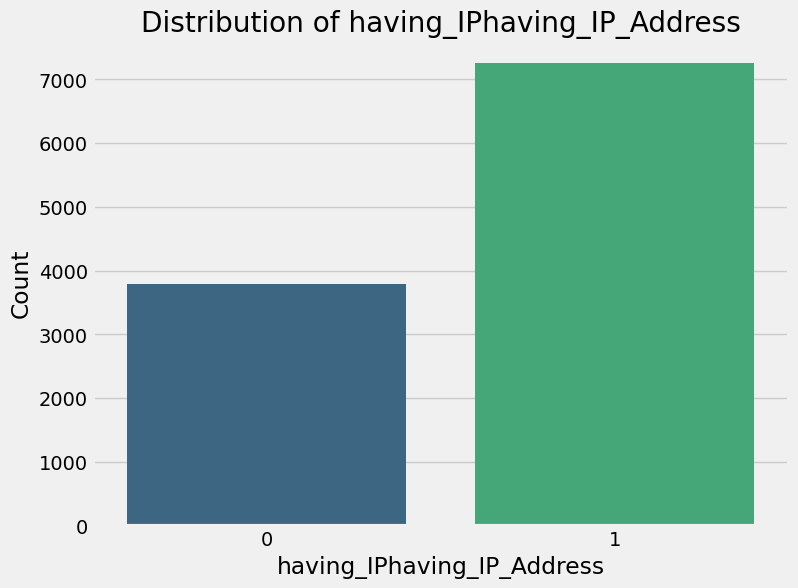

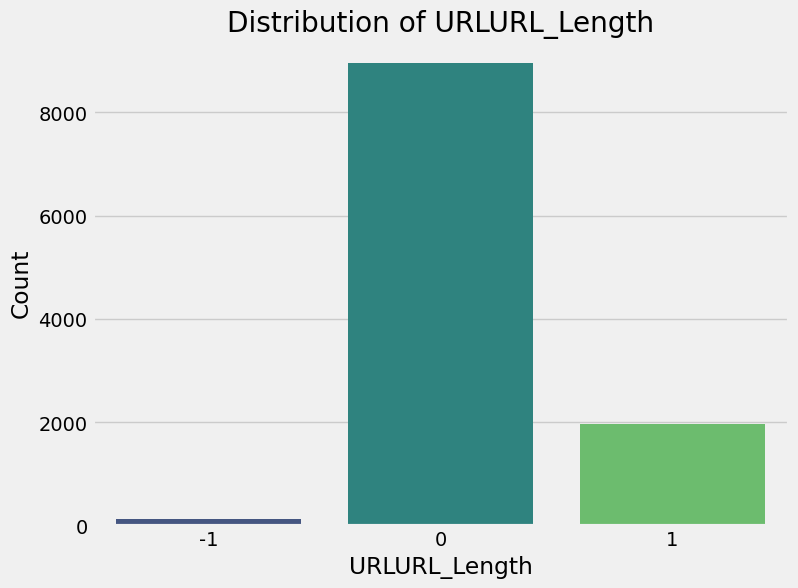

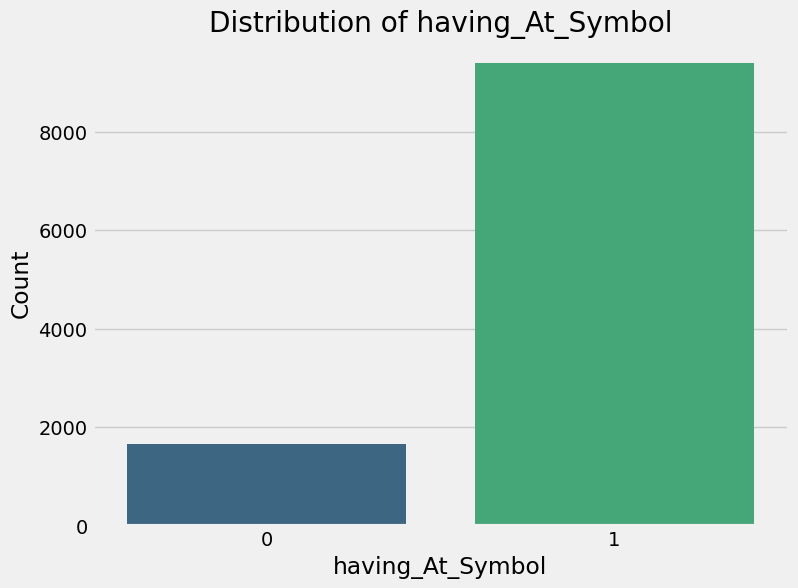

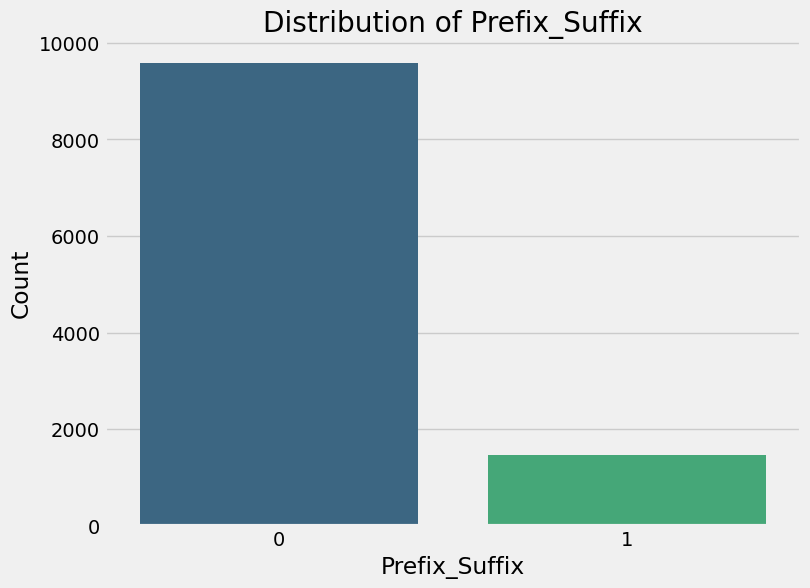

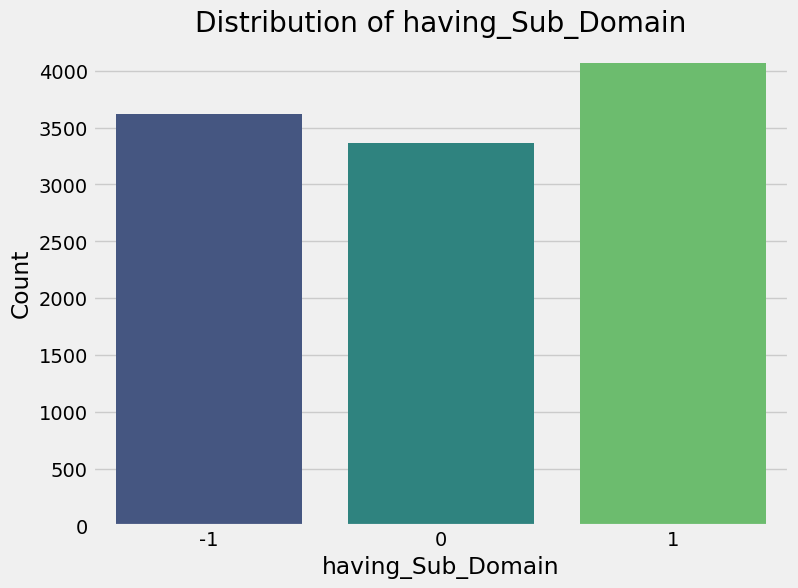

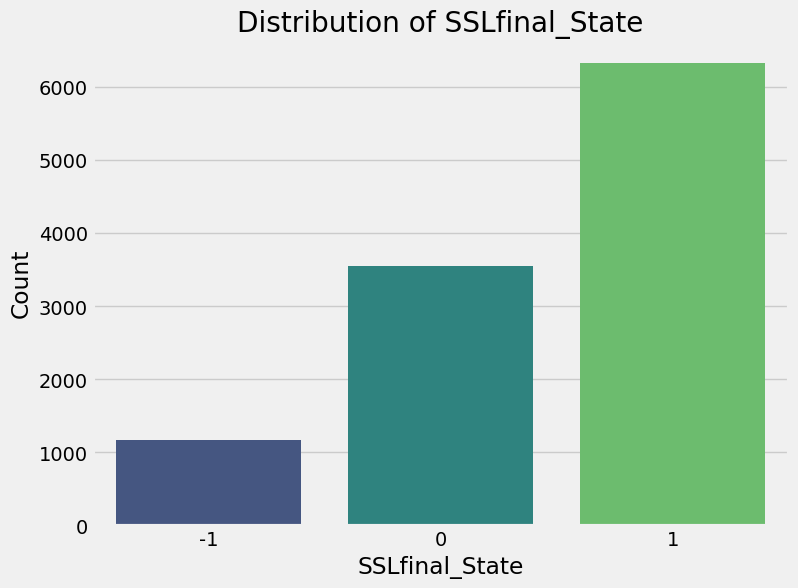

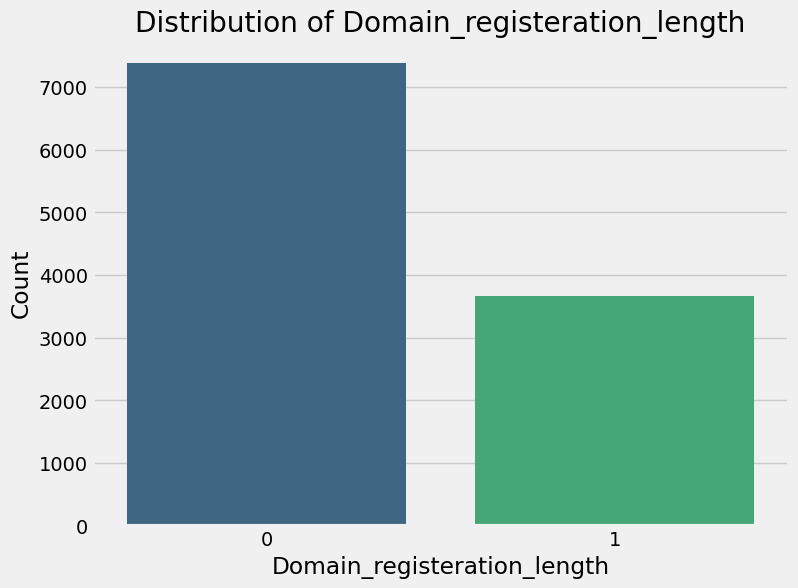

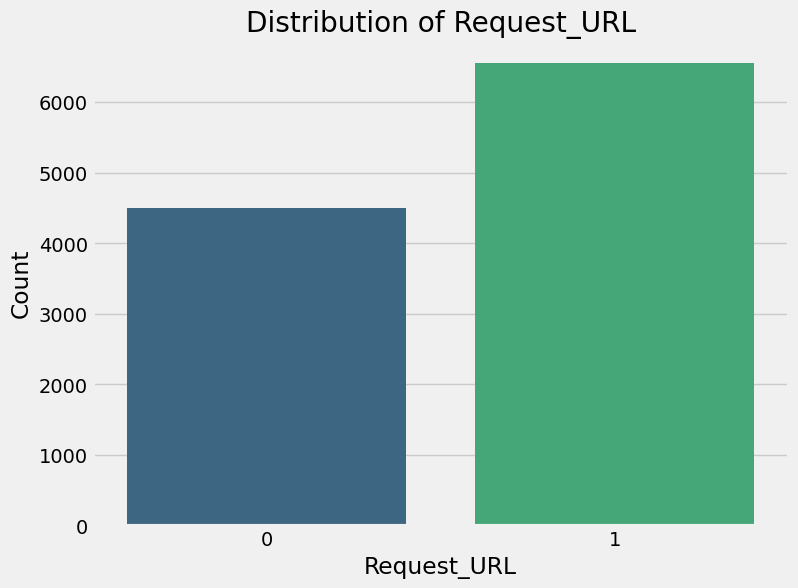

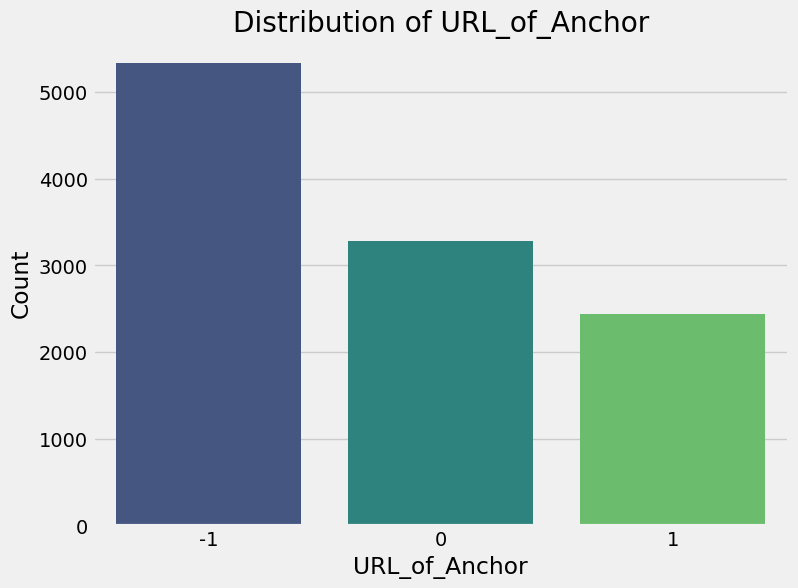

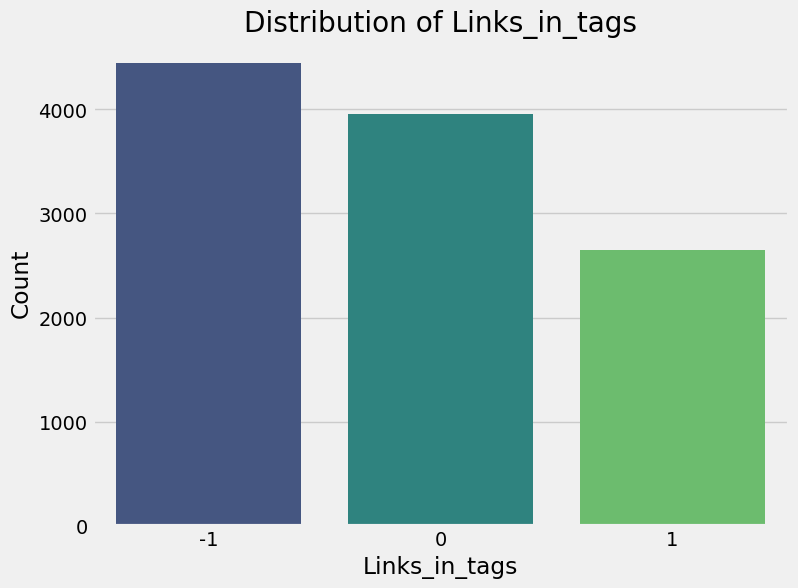

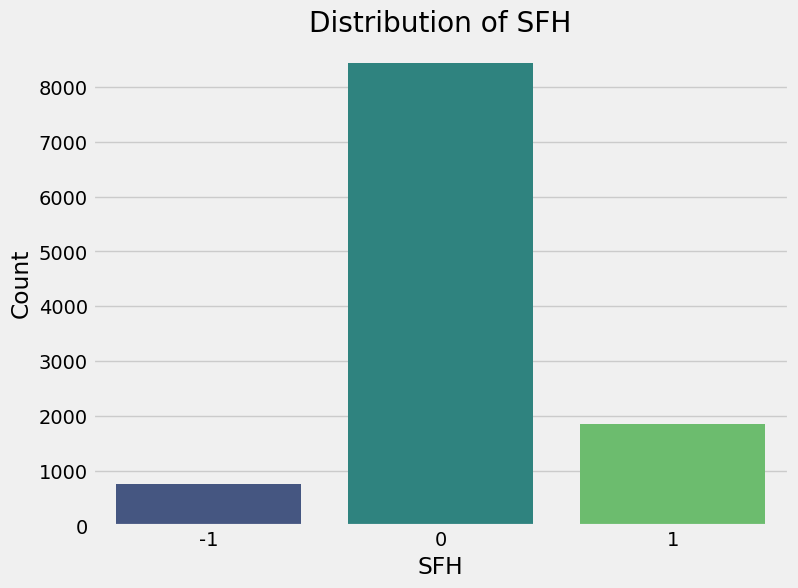

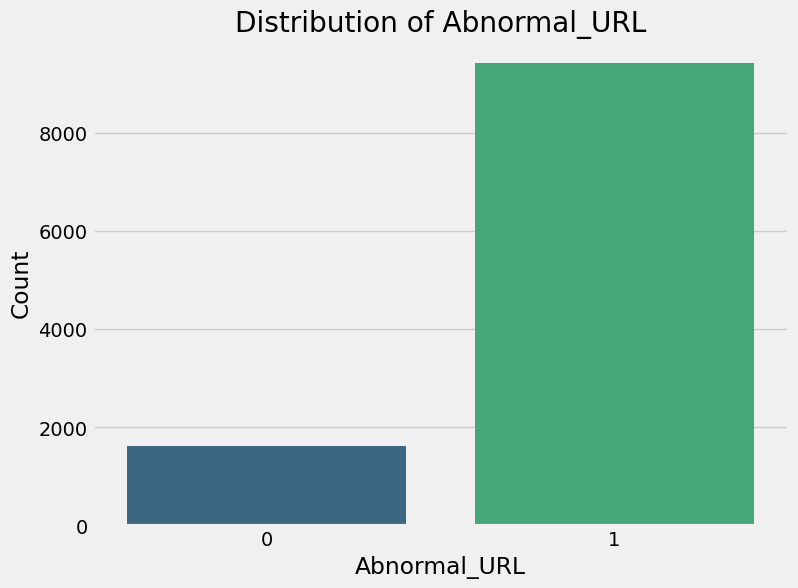

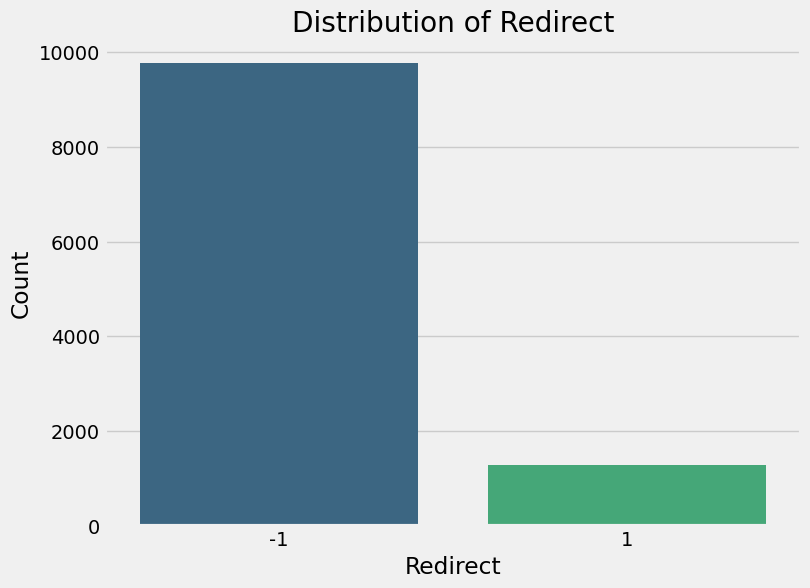

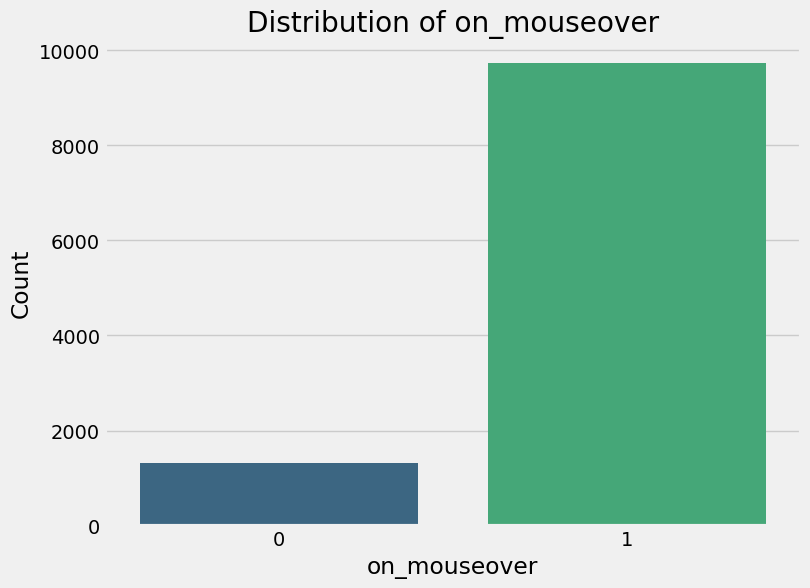

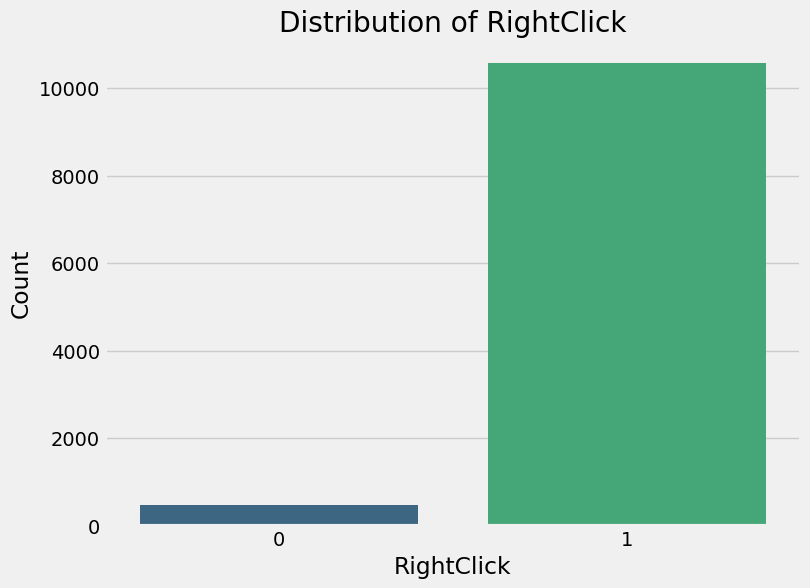

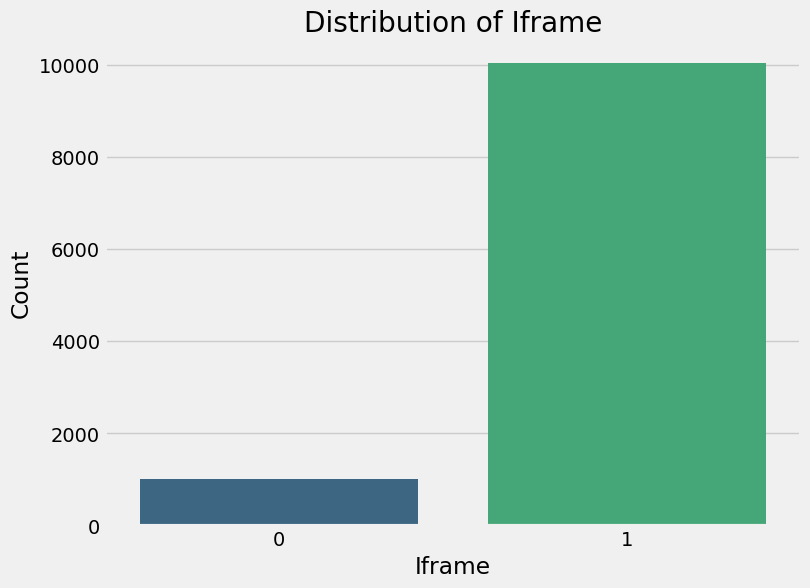

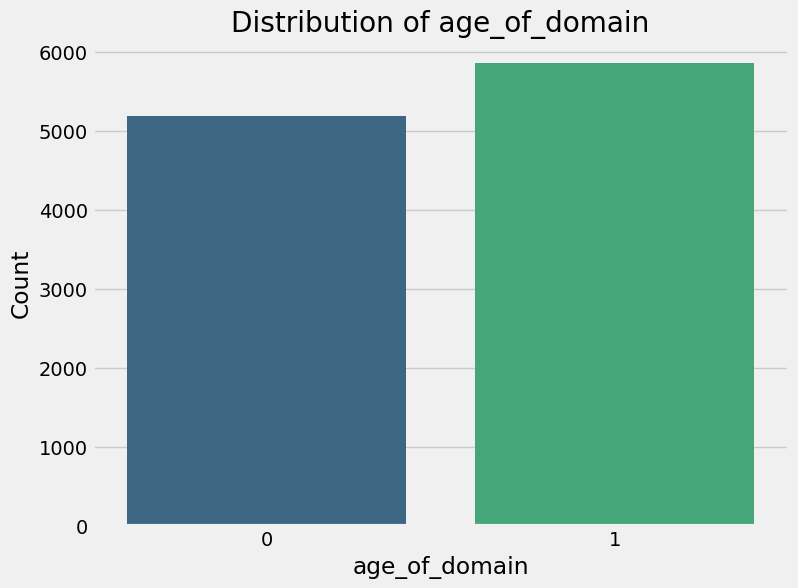

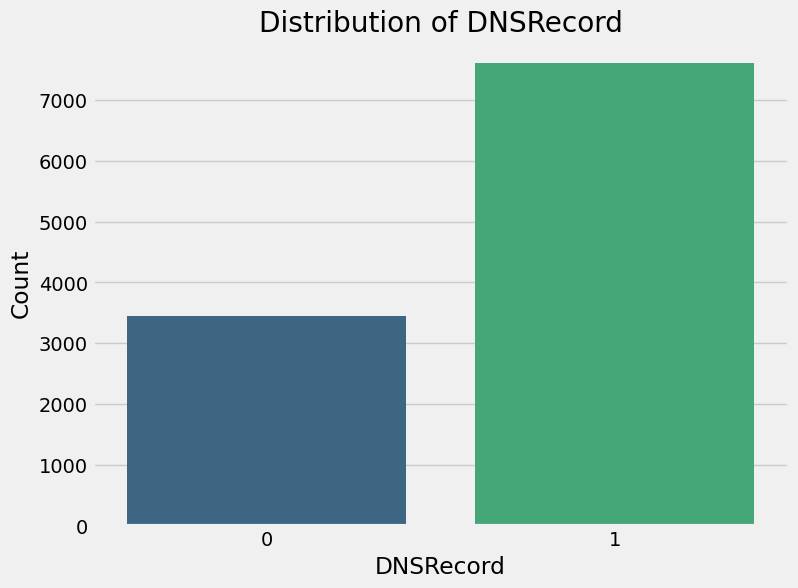

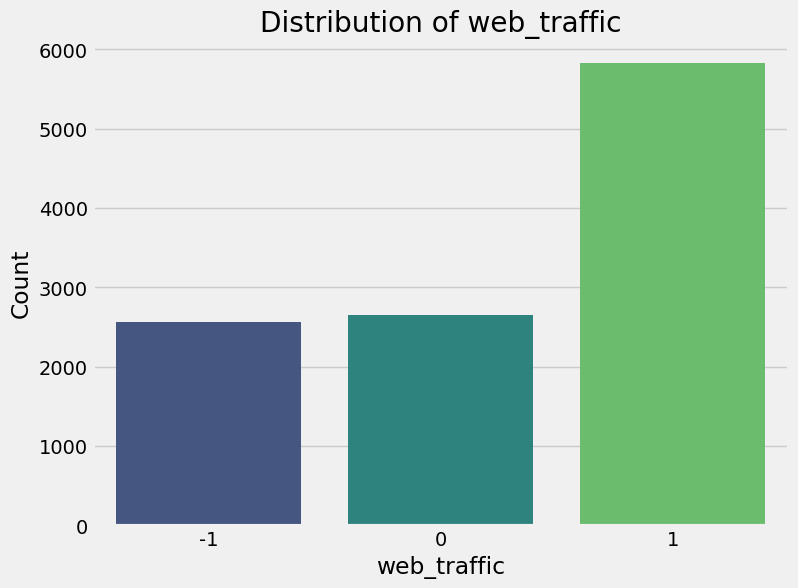

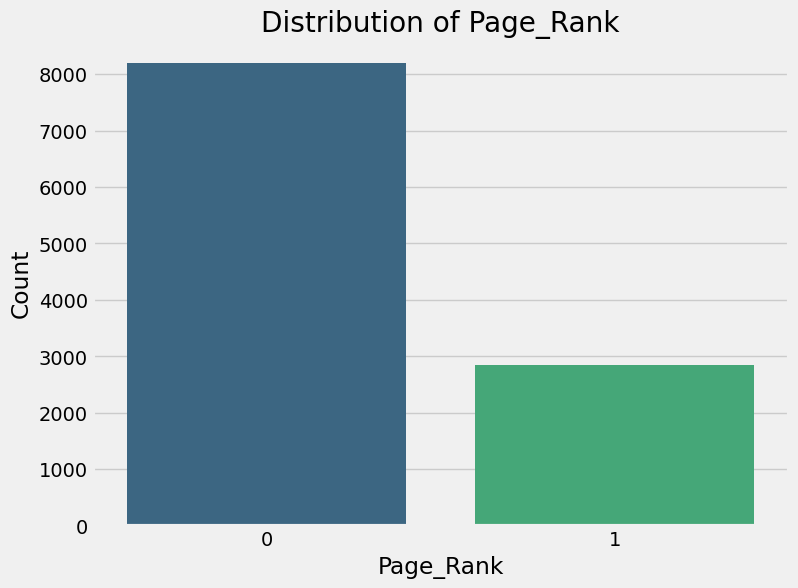

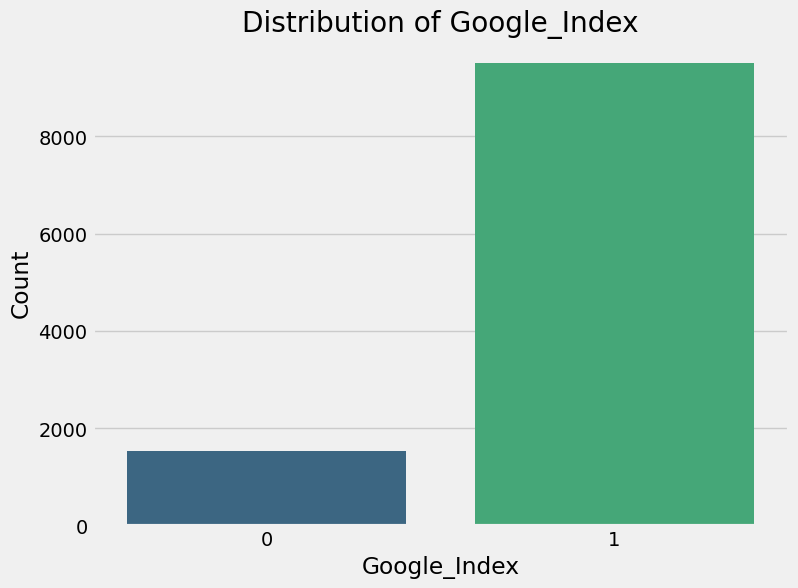

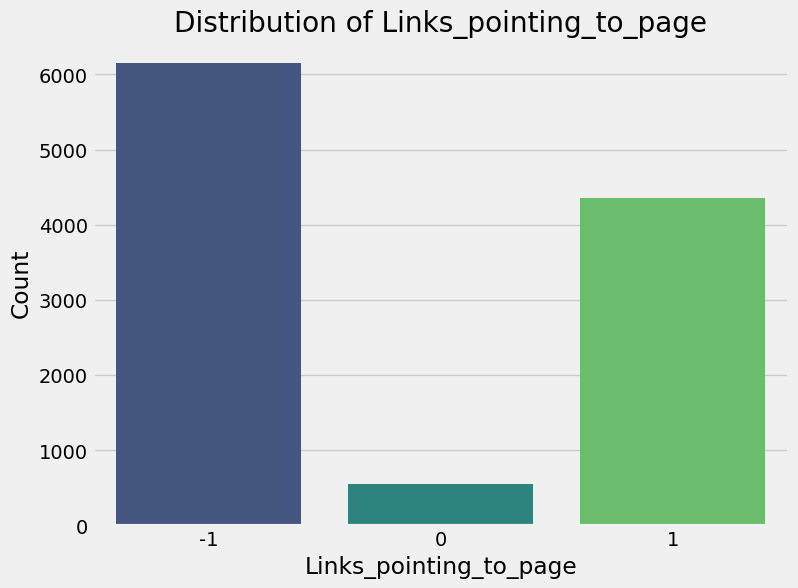

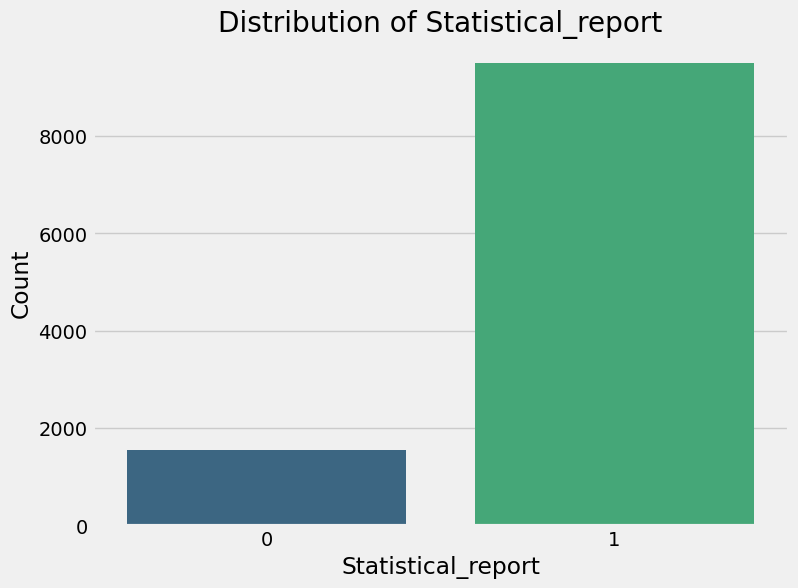

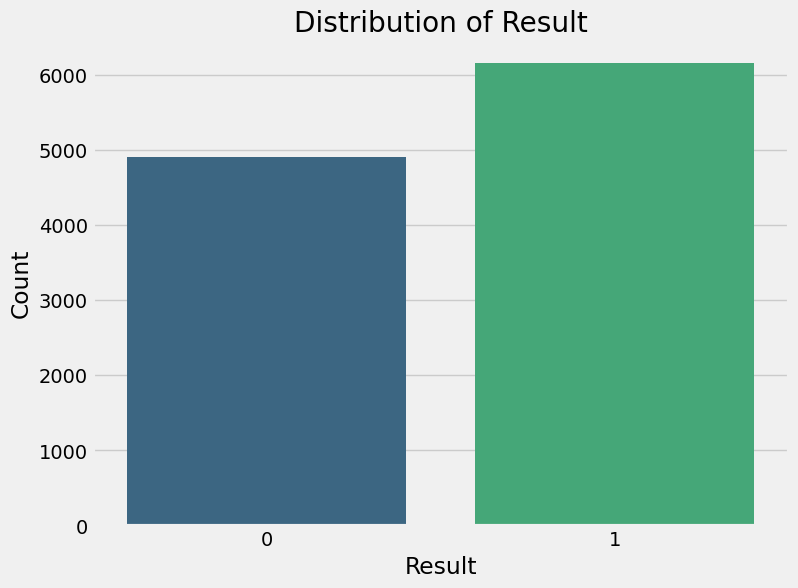

In [ ]:
for col in shop_new.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=shop_new, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
for col in shop_new.columns:
  print(shop_new[col].value_counts())

having_IPhaving_IP_Address
1    7262
0    3793
Name: count, dtype: int64
URLURL_Length
 0    8960
 1    1960
-1     135
Name: count, dtype: int64
having_At_Symbol
1    9400
0    1655
Name: count, dtype: int64
Prefix_Suffix
0    9590
1    1465
Name: count, dtype: int64
having_Sub_Domain
 1    4070
-1    3622
 0    3363
Name: count, dtype: int64
SSLfinal_State
 1    6331
 0    3557
-1    1167
Name: count, dtype: int64
Domain_registeration_length
0    7389
1    3666
Name: count, dtype: int64
Request_URL
1    6560
0    4495
Name: count, dtype: int64
URL_of_Anchor
-1    5337
 0    3282
 1    2436
Name: count, dtype: int64
Links_in_tags
-1    4449
 0    3956
 1    2650
Name: count, dtype: int64
SFH
 0    8440
 1    1854
-1     761
Name: count, dtype: int64
Abnormal_URL
1    9426
0    1629
Name: count, dtype: int64
Redirect
-1    9776
 1    1279
Name: count, dtype: int64
on_mouseover
1    9740
0    1315
Name: count, dtype: int64
RightClick
1    10579
0      476
Name: count, dtype: int64
Ifram

## **Analysis**


1. **Features with a high concentration of a single value:**
   - **having_IPhaving_IP_Address**: The majority of URLs (7262 out of 11055) contain an IP address (1), while 3793 URLs do not (0). This could be a useful feature for detecting phishing sites that may lack a proper domain.
   - **having_At_Symbol**: Most URLs (9400 out of 11055) have an '@' symbol (1), which is typically indicative of email-related content or legitimate websites. This feature might help identify suspicious or phishing sites that do not contain an '@' symbol.
   - **Abnormal_URL**: 9426 URLs are marked as abnormal (1), with only 1629 URLs being classified as normal (0). This suggests that abnormal URLs are quite frequent in your dataset and could play a key role in distinguishing phishing sites.
   - **Google_Index**: Most URLs are indexed by Google (9516 out of 11055), with only 1539 URLs not indexed. A missing Google index could be a characteristic of phishing sites, as they are less likely to be indexed.
   - **Result**: A high proportion of URLs are labeled as phishing (6157 out of 11055), which is expected as your dataset seems to focus on detecting phishing URLs.

2. **Features with a fairly balanced distribution:**
   - **SSLfinal_State**: The distribution is relatively balanced with 6331 URLs having SSL (1), 3557 without (0), and 1167 with an unknown state (-1). SSL encryption is important for legitimate sites, so URLs without SSL or with an unknown state might be more likely to be phishing.
   - **having_At_Symbol**: A large majority of URLs have the '@' symbol (1), while a smaller proportion does not (0). This could be indicative of legitimate email-based URLs but also phishing tactics where the '@' symbol is absent.
   - **age_of_domain**: The majority of URLs (5866 out of 11055) have an aged domain (1), while 5189 have a younger domain (0). This suggests that aged domains may correlate with legitimate sites, while newer domains could be linked to phishing sites.

3. **Features with a multi-class or skewed distribution:**
   - **URL_of_Anchor**: The distribution is slightly skewed towards -1 (5337 URLs), with fewer URLs marked as legitimate (1) and normal (0). This suggests that the presence or absence of certain anchors in the URL can be important for distinguishing phishing from legitimate sites.
   - **Links_in_tags**: A similar distribution is observed here, with -1 (indicating suspicious behavior) being the most common value, followed by 0 (normal) and 1 (legitimate). This suggests that links in tags might frequently be associated with suspicious URLs.
   - **web_traffic**: This feature has a balanced distribution with a significant number of URLs marked as 1 (indicating legitimate traffic) and a few marked as -1 or 0 (indicating suspicious or no traffic). This suggests that phishing sites might have irregular or low web traffic.

4. **Features with a fairly low occurrence of suspicious values:**
   - **Page_Rank**: The majority of URLs (8201 out of 11055) have a page rank of 0 (no rank), with fewer URLs having a page rank of 1 (2854 URLs). A low page rank might indicate a phishing site, as legitimate sites often have some level of ranking.
   - **Prefix_Suffix**: The majority of URLs (9590) do not have a prefix or suffix, which is typical for legitimate sites. This could be a distinguishing feature for phishing sites that often use unusual patterns or deceptive domain names.

5. **Features with diverse values but skewed towards legitimate characteristics:**
   - **SSLfinal_State**: With a decent number of SSL-secured URLs (6331) and a moderate number without SSL (3557), SSL presence could indicate legitimate websites.
   - **Redirect**: A significant majority of URLs are marked as -1 (suspicious), followed by 1 (legitimate). This indicates that redirects might often be suspicious but could also happen in legitimate URLs.

### Insights for your Analysis:
- **Phishing Detection**: Features like **having_IPhaving_IP_Address**, **SSLfinal_State**, and **Abnormal_URL** seem to have strong discriminatory power. A higher concentration of 1's for these features indicates characteristics of phishing sites.
- **Legitimate Site Detection**: Features such as **having_At_Symbol**, **Google_Index**, and **age_of_domain** have high frequencies for legitimate URLs and can act as strong indicators of trustworthiness.
- **Suspicious or Abnormal Behavior**: Features with a heavy skew toward -1 or 0, such as **URL_of_Anchor**, **Links_in_tags**, and **Redirect**, should be closely examined for detecting anomalies or suspicious behavior.

## **Data Preparation for Modeling**
- Feature-Target Split and Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = shop_new.drop(columns=['Result'])  # Assuming 'Result' is the target
y = shop_new['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (7738, 23)
Testing Set Shape: (3317, 23)


**Note** :
- As the all features for our predictive analytics are of 0,1,-1 values i.e Categorical in nature we dont reuiqre standardization of this independent variables

## **Model Building and Evaluation**

## Using K fold cross validation
- K = 5

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import numpy as np

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Initialize k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for model_name, model in models.items():
    accuracies = []
    roc_aucs = []

    print(f"\nModel: {model_name}")
    for train_index, test_index in kf.split(X):
        # Split data into train and test based on current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # ROC-AUC score
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        roc_aucs.append(roc_auc)

        # Print classification report for the current fold (optional)
        print(f"\nClassification Report for Fold:")
        print(classification_report(y_test, y_pred))

    # Average metrics across folds
    print(f"\n{model_name} Average Accuracy: {np.mean(accuracies):.4f}")
    print(f"{model_name} Average ROC-AUC: {np.mean(roc_aucs):.4f}")
    print('============================================================')



Model: Logistic Regression

Classification Report for Fold:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       956
           1       0.91      0.93      0.92      1255

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211


Classification Report for Fold:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       950
           1       0.93      0.91      0.92      1261

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211


Classification Report for Fold:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       997
           1       0.91      0.93      0.92      1214

    accuracy                           0.91      2211
 

### Summary of Results:

1. **Logistic Regression**:
   - **Average Accuracy**: 91.12%
   - **Average ROC-AUC**: 96.83%
   - Moderate performance across all metrics, demonstrating good precision, recall, and f1-scores for both classes.

2. **Random Forest**:
   - **Average Accuracy**: 96.99%
   - **Average ROC-AUC**: 99.53%
   - Superior performance with very high precision, recall, and f1-scores for both classes. Exhibits robust classification ability across all folds.

3. **Support Vector Machine (SVM)**:
   - **Average Accuracy**: 95.03%
   - **Average ROC-AUC**: 98.88%
   - Performs well, with high precision and recall. Slightly lower than Random Forest in both accuracy and ROC-AUC.

---

### Best Model: **Random Forest**

- Random Forest outperforms Logistic Regression and SVM with the highest average accuracy (96.99%) and ROC-AUC (99.53%).
- It delivers consistently excellent classification metrics across folds, making it the most reliable and effective model for this dataset.

## Feature Importance

In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance in a readable format
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)



Feature Importance:
                        Feature  Importance
5                SSLfinal_State    0.403970
8                 URL_of_Anchor    0.151274
18                  web_traffic    0.086500
4             having_Sub_Domain    0.069444
3                 Prefix_Suffix    0.044312
9                 Links_in_tags    0.038338
10                          SFH    0.022128
7                   Request_URL    0.020586
21       Links_pointing_to_page    0.020145
16                age_of_domain    0.017624
0    having_IPhaving_IP_Address    0.015926
6   Domain_registeration_length    0.015828
17                    DNSRecord    0.015751
20                 Google_Index    0.014039
19                    Page_Rank    0.013909
1                 URLURL_Length    0.010784
12                     Redirect    0.007530
11                 Abnormal_URL    0.006645
22           Statistical_report    0.006578
2              having_At_Symbol    0.006504
13                 on_mouseover    0.006058
15         

## Insights

The features were ranked based on their relative importance scores:

1. **SSLfinal_State** (0.403970): This feature emerged as the most significant, contributing nearly 40% of the model’s decision-making process. It suggests that the state of SSL (Secure Socket Layer) is a critical factor in determining the target outcome.
  
2. **URL_of_Anchor** (0.151274): The URL structure or presence of specific anchor tags in the webpage also plays a notable role in prediction accuracy, with an importance of around 15%.

3. **web_traffic** (0.086500): Web traffic, reflecting the popularity and usage of the website, is another influential feature.

4. **having_Sub_Domain** (0.069444): The presence of subdomains within the website also contributes significantly, influencing the model’s outcome.


### **Implications:**
- The **SSLfinal_State** is a dominant factor in the classification process, emphasizing the significance of website security.
- URL structure and web traffic analysis are also key predictors, pointing to the relevance of content and user engagement metrics in classification tasks.
- Features with lower importance, like **Iframe** and **RightClick**, may not require much attention in further model refinement.

## ROC Curve


Model: Logistic Regression

Model: Random Forest

Model: Support Vector Machine


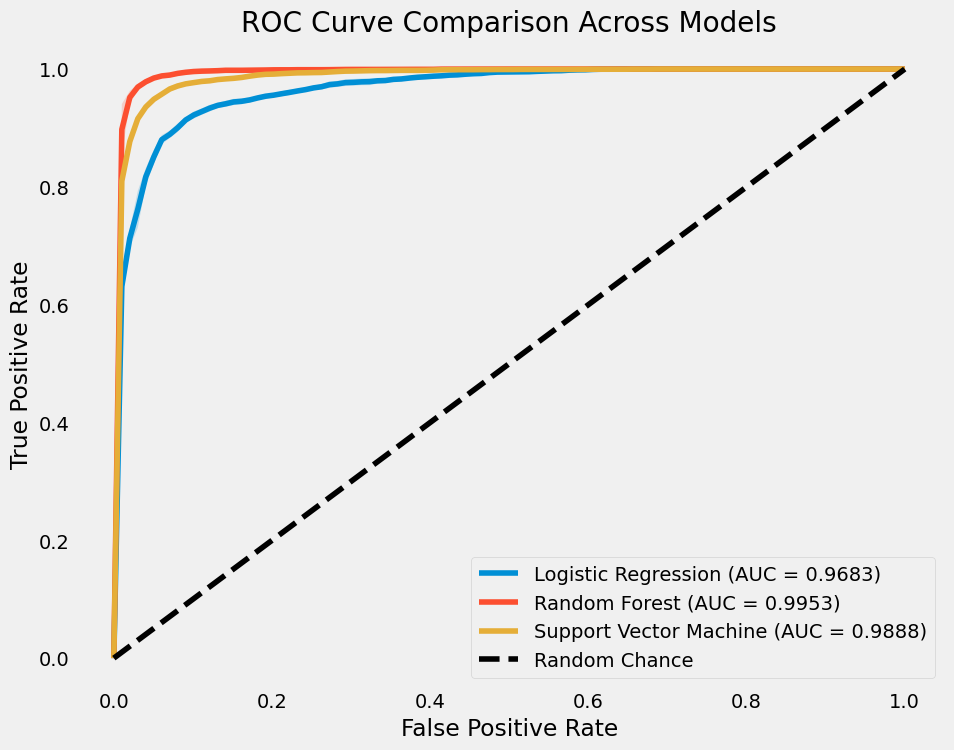

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Initialize k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Plot ROC Curves for each model
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    tprs = []  # True positive rates
    aucs = []  # AUC scores
    mean_fpr = np.linspace(0, 1, 100)  # Mean false positive rate

    print(f"\nModel: {model_name}")
    for train_index, test_index in kf.split(X):
        # Split data into train and test based on current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Get predicted probabilities for the positive class
        y_prob = model.predict_proba(X_test)[:, 1]

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        tprs.append(np.interp(mean_fpr, fpr, tpr))  # Interpolate tpr for uniform fpr
        tprs[-1][0] = 0.0  # Ensure the curve starts at (0,0)
        aucs.append(roc_auc_score(y_test, y_prob))

    # Calculate mean and standard deviation of tprs
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0  # Ensure the curve ends at (1,1)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    # Plot mean ROC curve
    plt.plot(mean_fpr, mean_tpr, label=f"{model_name} (AUC = {mean_auc:.4f})")

    # Fill the standard deviation range
    std_tpr = np.std(tprs, axis=0)
    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, alpha=0.2)

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Confusion Matrix


Model: Logistic Regression


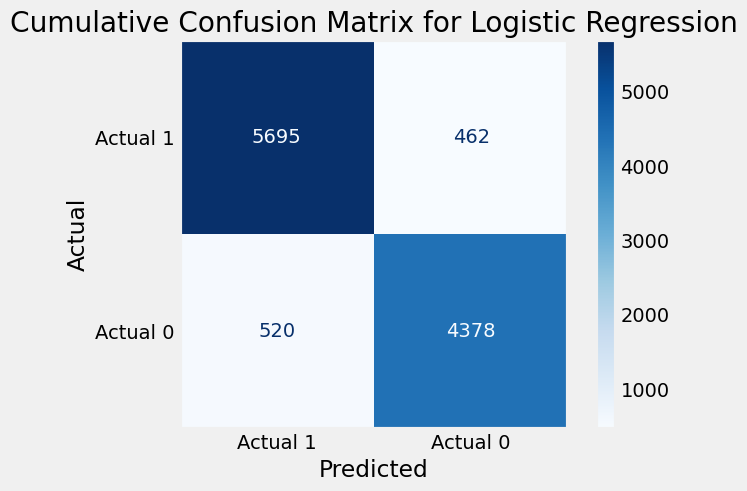


Model: Random Forest


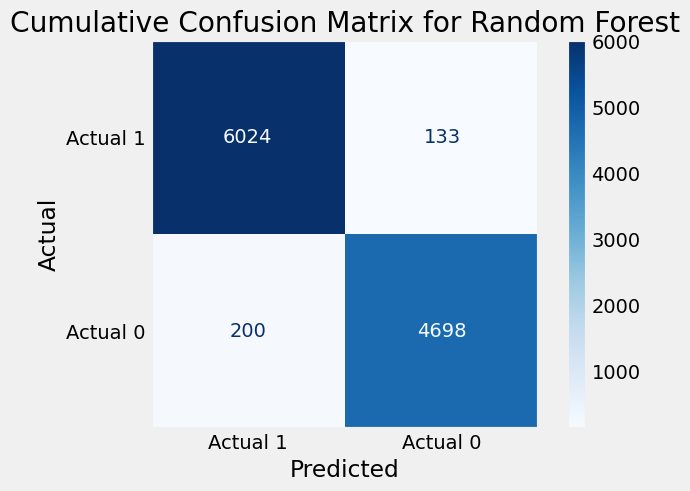


Model: Support Vector Machine


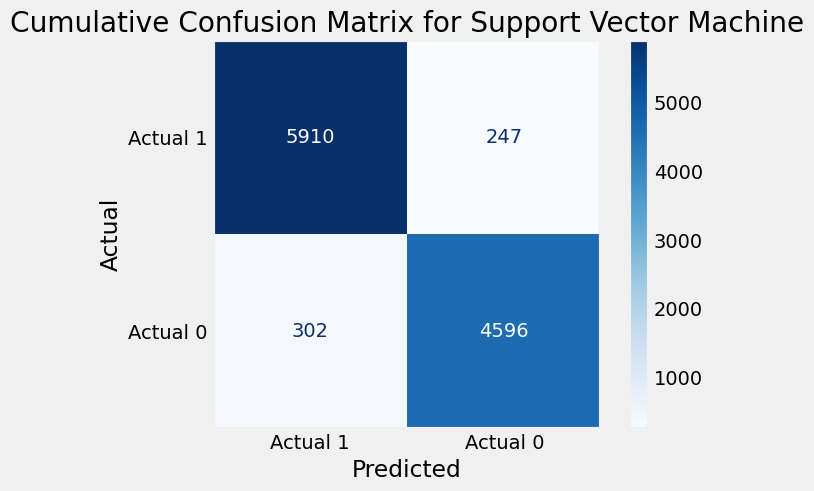

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Initialize k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Plot Confusion Matrix for each model
for model_name, model in models.items():
    # Initialize cumulative confusion matrix
    cumulative_cm = np.array([[0, 0], [0, 0]])

    print(f"\nModel: {model_name}")
    for train_index, test_index in kf.split(X):
        # Split data into train and test based on current fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Compute confusion matrix for the current fold
        cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Assuming binary classification with labels 1 and 0
        cumulative_cm += cm  # Accumulate the confusion matrices

    # Plot the cumulative confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cumulative_cm, display_labels=["Actual 1", "Actual 0"])
    disp.plot(cmap='Blues')
    plt.title(f"Cumulative Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.grid(False)
    plt.show()


## Evalution Metrics for Random Forest

based on the Result feature (which seems to indicate whether a URL is legitimate or phishing):

Positive class (legitimate): The class labeled 1 (with 6157 occurrences) corresponds to legitimate URLs.
Negative class (phishing): The class labeled 0 (with 4898 occurrences) corresponds to phishing URLs.

In [54]:
# Define the confusion matrix values(from the cumulative confusion matrix for random forest)
TP = 6024
TN = 4698
FP = 200
FN = 133

# Calculate each metric with inline calculations
# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy = ({TP} + {TN}) / ({TP} + {TN} + {FP} + {FN}) = {accuracy:.3f}")

# Sensitivity (Recall or True Positive Rate)
sensitivity = TP / (TP + FN)
print(f"Sensitivity = {TP} / ({TP} + {FN}) = {sensitivity:.3f}")

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)
print(f"Specificity = {TN} / ({TN} + {FP}) = {specificity:.3f}")

# Precision (Positive Predictive Value)
precision = TP / (TP + FP)
print(f"Precision = {TP} / ({TP} + {FP}) = {precision:.3f}")

# F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f"F1 Score = 2 * ({precision:.3f} * {sensitivity:.3f}) / ({precision:.3f} + {sensitivity:.3f}) = {f1_score:.3f}")


Accuracy = (6024 + 4698) / (6024 + 4698 + 200 + 133) = 0.970
Sensitivity = 6024 / (6024 + 133) = 0.978
Specificity = 4698 / (4698 + 200) = 0.959
Precision = 6024 / (6024 + 200) = 0.968
F1 Score = 2 * (0.968 * 0.978) / (0.968 + 0.978) = 0.973


# **Conclusion**

Based on the evaluation metrics, ROC curve, and confusion matrix, here’s a summary of all the key metrics and a final recommendation on choosing the Random Forest model:

---
### Feature Importance

1. SSLfinal_State (0.403970): This feature emerged as the most significant, contributing nearly 40% of the model’s decision-making process. It suggests that the state of SSL (Secure Socket Layer) is a critical factor in determining the target outcome.

2. URL_of_Anchor (0.151274): The URL structure or presence of specific anchor tags in the webpage also plays a notable role in prediction accuracy, with an importance of around 15%.

3. web_traffic (0.086500): Web traffic, reflecting the popularity and usage of the website, is another influential feature.

4. having_Sub_Domain (0.069444): The presence of subdomains within the website also contributes significantly, influencing the model’s outcome.


### Evaluation Metrics

- Accuracy = 0.970
- Sensitivity = 0.978
- Specificity = 0.959
- Precision = 0.968
- F1 Score = 0.973
### ROC Curve

From the ROC curve comparison across models, we observed:

- **Random Forest AUC**: 0.9953
- **Support Vector Machine AUC**: 0.9888
- **Logistic Regression AUC**: 0.9683

The Random Forest model has the highest Area Under the Curve (AUC), indicating it has the best performance in distinguishing between classes.

### Confusion Matrix for Random Forest

|            | Predicted Positive (1) | Predicted Negative (0) |
|------------|-------------------------|-------------------------|
| **Actual Positive (1)** | 6024                    | 133                     |
| **Actual Negative (0)** | 200                     | 4698                    |

- **True Positives (TP)**: 6024
- **True Negatives (TN)**: 4698
- **False Positives (FP)**: 200
- **False Negatives (FN)**: 133

### Analysis & Final Recommendation

- The Random Forest model outperforms other models in almost all evaluation metrics, providing a **high accuracy of 97.0%**, **excellent sensitivity (97.8%)**, **high specificity (95.9%)**, and **high precision (96.8%)**. Additionally, the **AUC of 0.9953** on the ROC curve confirms the model’s superior ability to differentiate between classes.

- The confusion matrix for Random Forest shows minimal false positives and false negatives, further indicating its reliability in predictions. The low false positive and false negative rates (4.1% and 2.2%, respectively) highlight its balanced performance across both classes.

- Furthermore, the feature importance analysis reinforces that key predictors, such as SSLfinal_State and URL_of_Anchor, significantly contribute to the model's success.

- Considering these points, **Random Forest is recommended** as the best model for this classification task due to its high predictive accuracy, strong balance between sensitivity and specificity, and superior AUC performance. This model provides a reliable and robust solution for accurate predictions in this context.